## Import

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn.neural_network import MLPClassifier

## Prep Data

In [9]:
path = r'C:\Users\isava\OneDrive\Documents\CareerFoundry\MachineLearning\ClimateWins\02 Data\OriginalData'

In [11]:
#col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
df_scaled = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed-scaled.csv'))
ans = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))


In [281]:
df_scaled.head()

,Unnamed: 0,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,1.317965,0.660721,-0.348893,-0.268791,-0.927601,-0.667864,-1.158624,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-

In [283]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84

In [192]:
df = df.drop("MONTH", axis = 1)
df_scaled = df_scaled.drop("MONTH", axis = 1)
df_scaled = df_scaled.drop("Unnamed: 0", axis = 1)


In [291]:
df.head()

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,6,2.1,0.84,1.018,0.3

In [13]:

df_cols = df.columns.tolist()
df_cols_cities = []
for i in df_cols:
    df_cols_cities.append(i.split("_")[0])
print(df_cols_cities)


['DATE', 'MONTH', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BASEL', 'BELGRADE', 'BELGRADE', 'BELGRADE', 'BELGRADE', 'BELGRADE', 'BELGRADE', 'BELGRADE', 'BELGRADE', 'BELGRADE', 'BUDAPEST', 'BUDAPEST', 'BUDAPEST', 'BUDAPEST', 'BUDAPEST', 'BUDAPEST', 'BUDAPEST', 'BUDAPEST', 'BUDAPEST', 'DEBILT', 'DEBILT', 'DEBILT', 'DEBILT', 'DEBILT', 'DEBILT', 'DEBILT', 'DEBILT', 'DEBILT', 'DEBILT', 'DUSSELDORF', 'DUSSELDORF', 'DUSSELDORF', 'DUSSELDORF', 'DUSSELDORF', 'DUSSELDORF', 'DUSSELDORF', 'DUSSELDORF', 'DUSSELDORF', 'DUSSELDORF', 'DUSSELDORF', 'GDANSK', 'GDANSK', 'GDANSK', 'GDANSK', 'GDANSK', 'GDANSK', 'GDANSK', 'HEATHROW', 'HEATHROW', 'HEATHROW', 'HEATHROW', 'HEATHROW', 'HEATHROW', 'HEATHROW', 'HEATHROW', 'HEATHROW', 'HEATHROW', 'KASSEL', 'KASSEL', 'KASSEL', 'KASSEL', 'KASSEL', 'KASSEL', 'KASSEL', 'KASSEL', 'KASSEL', 'LJUBLJANA', 'LJUBLJANA', 'LJUBLJANA', 'LJUBLJANA', 'LJUBLJANA', 'LJUBLJANA', 'LJUBLJANA', 'LJUBLJANA', 'LJUBLJANA', 'LJUBLJANA', 'MA

In [15]:
df_cols_cities = set(df_cols_cities)
print(df_cols_cities)

{'MAASTRICHT', 'MADRID', 'MONTH', 'HEATHROW', 'KASSEL', 'OSLO', 'LJUBLJANA', 'BASEL', 'SONNBLICK', 'ROMA', 'STOCKHOLM', 'VALENTIA', 'BUDAPEST', 'MUNCHENB', 'DATE', 'DEBILT', 'TOURS', 'DUSSELDORF', 'BELGRADE', 'GDANSK'}


In [37]:
ans.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
ans_cols = ans.columns.tolist()
ans_cols_cities = []
for i in ans_cols:
    ans_cols_cities.append(i.split("_")[0])


In [19]:
ans_cols_cities = set(ans_cols_cities)
print(ans_cols_cities)

{'DUSSELDORF', 'MAASTRICHT', 'LJUBLJANA', 'MADRID', 'BASEL', 'STOCKHOLM', 'VALENTIA', 'BELGRADE', 'BUDAPEST', 'MUNCHENB', 'SONNBLICK', 'HEATHROW', 'DATE', 'DEBILT', 'KASSEL', 'OSLO'}


In [21]:
#Remove columns from original df that start with the following cities 
remove = df_cols_cities - ans_cols_cities 
print(remove)

{'GDANSK', 'MONTH', 'ROMA', 'TOURS'}


In [23]:
for i in remove: #remove columns that start with city names not located in the answer data set
    df = df.loc[:,~df.columns.str.startswith(i)]
    df_scaled = df_scaled.loc[:,~df_scaled.columns.str.startswith(i)]



In [25]:
#remove temp columns

df = df.loc[:,df.columns.str.contains("_temp_")]
df_scaled = df_scaled.loc[:,df_scaled.columns.str.contains("_temp_")]

In [57]:
df_scaled.columns.tolist()

['BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']

In [27]:
ans = ans.drop("DATE", axis = 1)

In [65]:
df_scaled.head()

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-0.528623,-0.845652,-0.478356,-1.016876,-1.220210,-0.949203,-1.099163,-1.119431,-1.136839,-0.114356,...,-0.474865,-0.124331,-0.170125,-0.063322,-0.391072,-0.290439,-0.639538,-0.668215,-0.519743,-0.752237
1,-0.582946,-0.462450,-0.569988,-1.107669,-0.818702,-1.298119,-1.110927,-0.878727,-1.341204,-0.367511,...,-0.582847,-0.650834,-0.456455,-0.839563,-0.415953,-0.183610,-0.628550,-0.548046,-0.629054,-0.407141
2,-0.257010,-0.186545,-0.592896,-1.084971,-1.168403,-1.098738,-1.063873,-0.838610,-1.116403,-0.509912,...,-0.777215,-0.650834,-0.384873,-0.898147,-0.615003,-0.410621,-0.727444,-0.067372,0.054135,-0.177078
3,-0.555784,-0.385810,-0.512718,-1.209812,-1.362681,-1.437685,-1.146217,-1.012452,-1.208367,-0.525734,...,-0.582847,-0.943336,-0.800052,-1.059254,-0.764290,-0.530804,-0.925231,-0.998679,-0.164486,-0.838511
4,-1.003946,-1.075573,-1.039603,-1.209812,-1.012980,-1.457623,-1.087400,-0.918844,-1.116403,-0.320045,...,-0.582847,-0.621584,-0.671203,-0.546642,-0.503037,-0.477389,-0.705467,-1.509396,-1.339569,-1.471186


# Analysis

## Prep

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df, ans, random_state=23)

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_scaled, ans, random_state=23)

In [241]:
X_train.head()

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18740,16.2,6.9,23.4,16.1,11.0,22.6,17.6,10.3,25.1,18.9,...,20.0,-2.5,-4.7,-0.2,11.6,5.5,17.5,10.7,7.9,13.5
8816,-0.9,-2.5,0.6,-1.1,-3.9,1.7,0.6,-0.5,1.5,-1.0,...,-5.3,-14.6,-16.2,-13.0,-3.0,-5.0,-1.6,4.5,-0.2,9.2
19200,24.9,17.6,32.4,23.4,20.2,29.0,22.4,19.5,27.3,21.2,...,23.5,3.6,1.9,5.2,18.8,16.2,21.8,10.7,7.9,13.5
4097,6.7,3.4,10.8,17.0,10.0,22.2,14.6,8.0,21.3,6.9,...,2.7,-6.3,-7.2,-5.3,0.0,-0.9,0.8,6.3,3.3,9.3
6465,13.9,12.7,16.0,21.2,13.8,29.2,17.9,14.6,23.9,11.2,...,13.7,1.4,-1.4,4.2,7.5,4.3,10.3,11.8,4.7,18.9


In [425]:
X_train_sc.head()

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18740,0.788701,0.089360,0.953395,0.390418,0.321065,0.516245,0.688874,0.311422,0.906812,1.404578,...,1.047681,0.372923,0.373902,0.376060,0.529531,0.150231,0.744975,-0.007287,-0.000520,-0.004530
8816,-1.533592,-1.351478,-1.658119,-1.561635,-1.608767,-1.567283,-1.310904,-1.132804,-1.504696,-1.744046,...,-1.684264,-1.396714,-1.272497,-1.498635,-1.286794,-1.251899,-1.353771,-1.869902,-2.214050,-1.241122
19200,1.970218,1.729464,1.984255,1.218906,1.512640,1.154262,1.253517,1.541689,1.131614,1.768490,...,1.425618,1.265053,1.318792,1.166947,1.425252,1.579068,1.217467,-0.007287,-0.000520,-0.004530
4097,-0.501462,-0.447122,-0.489810,0.492560,0.191546,0.476368,0.335972,0.003856,0.518518,-0.494089,...,-0.820408,-0.182831,0.015990,-0.370889,-0.913576,-0.704401,-1.090054,-1.329143,-1.257587,-1.212364
6465,0.476345,0.978388,0.105798,0.969225,0.683719,1.174201,0.724164,0.886438,0.784193,0.186267,...,0.367394,0.943301,0.846347,1.020486,0.019467,-0.010013,-0.046175,0.323176,-0.875001,1.548400


In [31]:
print(X_train.shape)
print(X_test.shape)
print(X_train_sc.shape)
print(X_test_sc.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


## KNN

### OG Data

In [33]:
from sklearn.multioutput import MultiOutputClassifier

In [35]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE # - 1 means use all available processes/threads
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


In [41]:
y_pred

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
print(metrics.classification_report(y_test.values, y_pred, zero_division = np.nan, target_names = locations))


              precision    recall  f1-score   support

  DUSSELDORF       0.70      0.71      0.70      1413
  MAASTRICHT       0.75      0.78      0.76      1982
   LJUBLJANA       0.75      0.80      0.77      1840
      MADRID       0.72      0.67      0.69      1097
       BASEL       0.72      0.63      0.67      1241
   STOCKHOLM       0.67      0.62      0.64      1240
    VALENTIA       0.70      0.67      0.68       910
    BELGRADE       0.73      0.75      0.74      1574
    BUDAPEST       0.71      0.68      0.69      1174
    MUNCHENB       0.84      0.89      0.86      2586
   SONNBLICK       0.70      0.68      0.69      1171
    HEATHROW       0.68      0.60      0.64       877
      KASSEL        nan       nan       nan         0
      DEBILT       0.68      0.67      0.68       969
        OSLO       0.60      0.26      0.37       307

   micro avg       0.73      0.72      0.73     18381
   macro avg       0.71      0.67      0.69     18381
weighted avg       0.73   

C:\Users\isava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


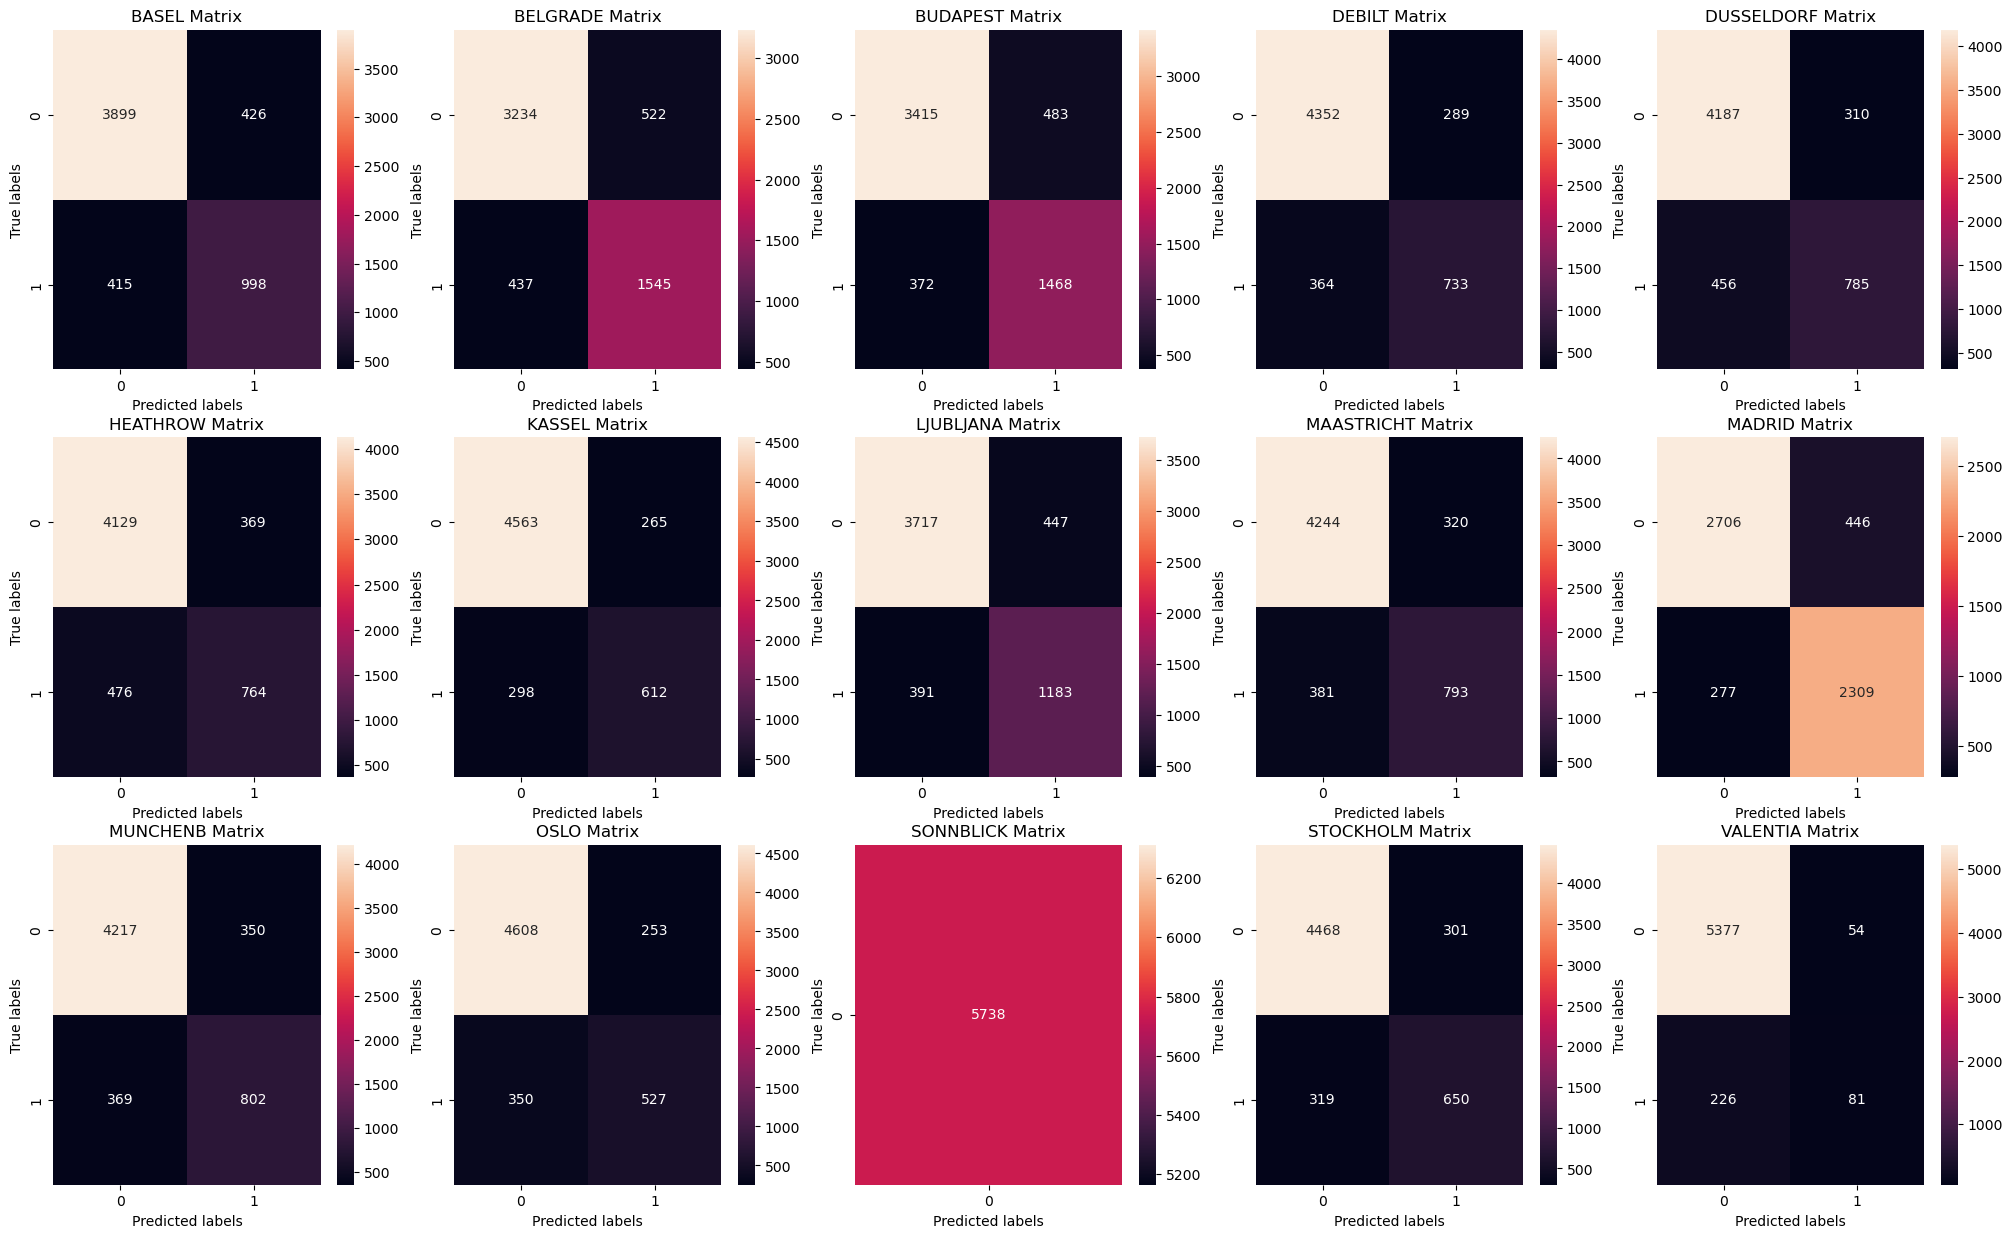

In [51]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks*/
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

The KNN model does well for predicting pleasant data but did not perform as well for unpleasant data. Madrid has the best performance.

<function matplotlib.pyplot.show(close=None, block=None)>

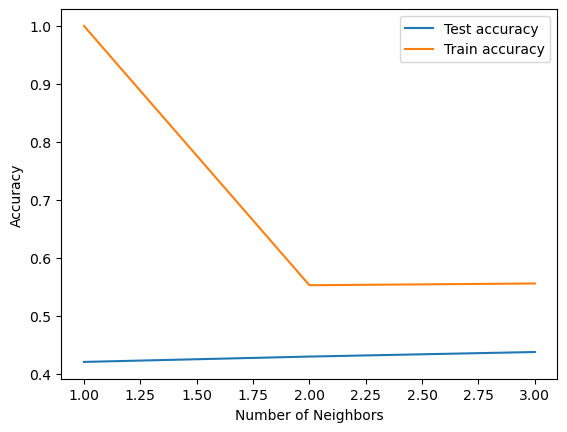

In [52]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

### Scaled Data

In [73]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))

scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE # - 1 means use all available processes/threads
    ## Fit the model on the training data.
    knn.fit(X_train_sc, y_train_sc)
    y_pred = knn.predict(X_test_sc)
    y_pred_train = knn.predict(X_train_sc)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE
    #train_f1[i] = f1_score(y_train_sc, knn.predict(X_train_sc)) #CHANGE THIS LINE
    #test_f1[i] = f1_score(y_test_sc,y_pred) #CHANGE THIS LINE
    

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


C:\Users\isava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


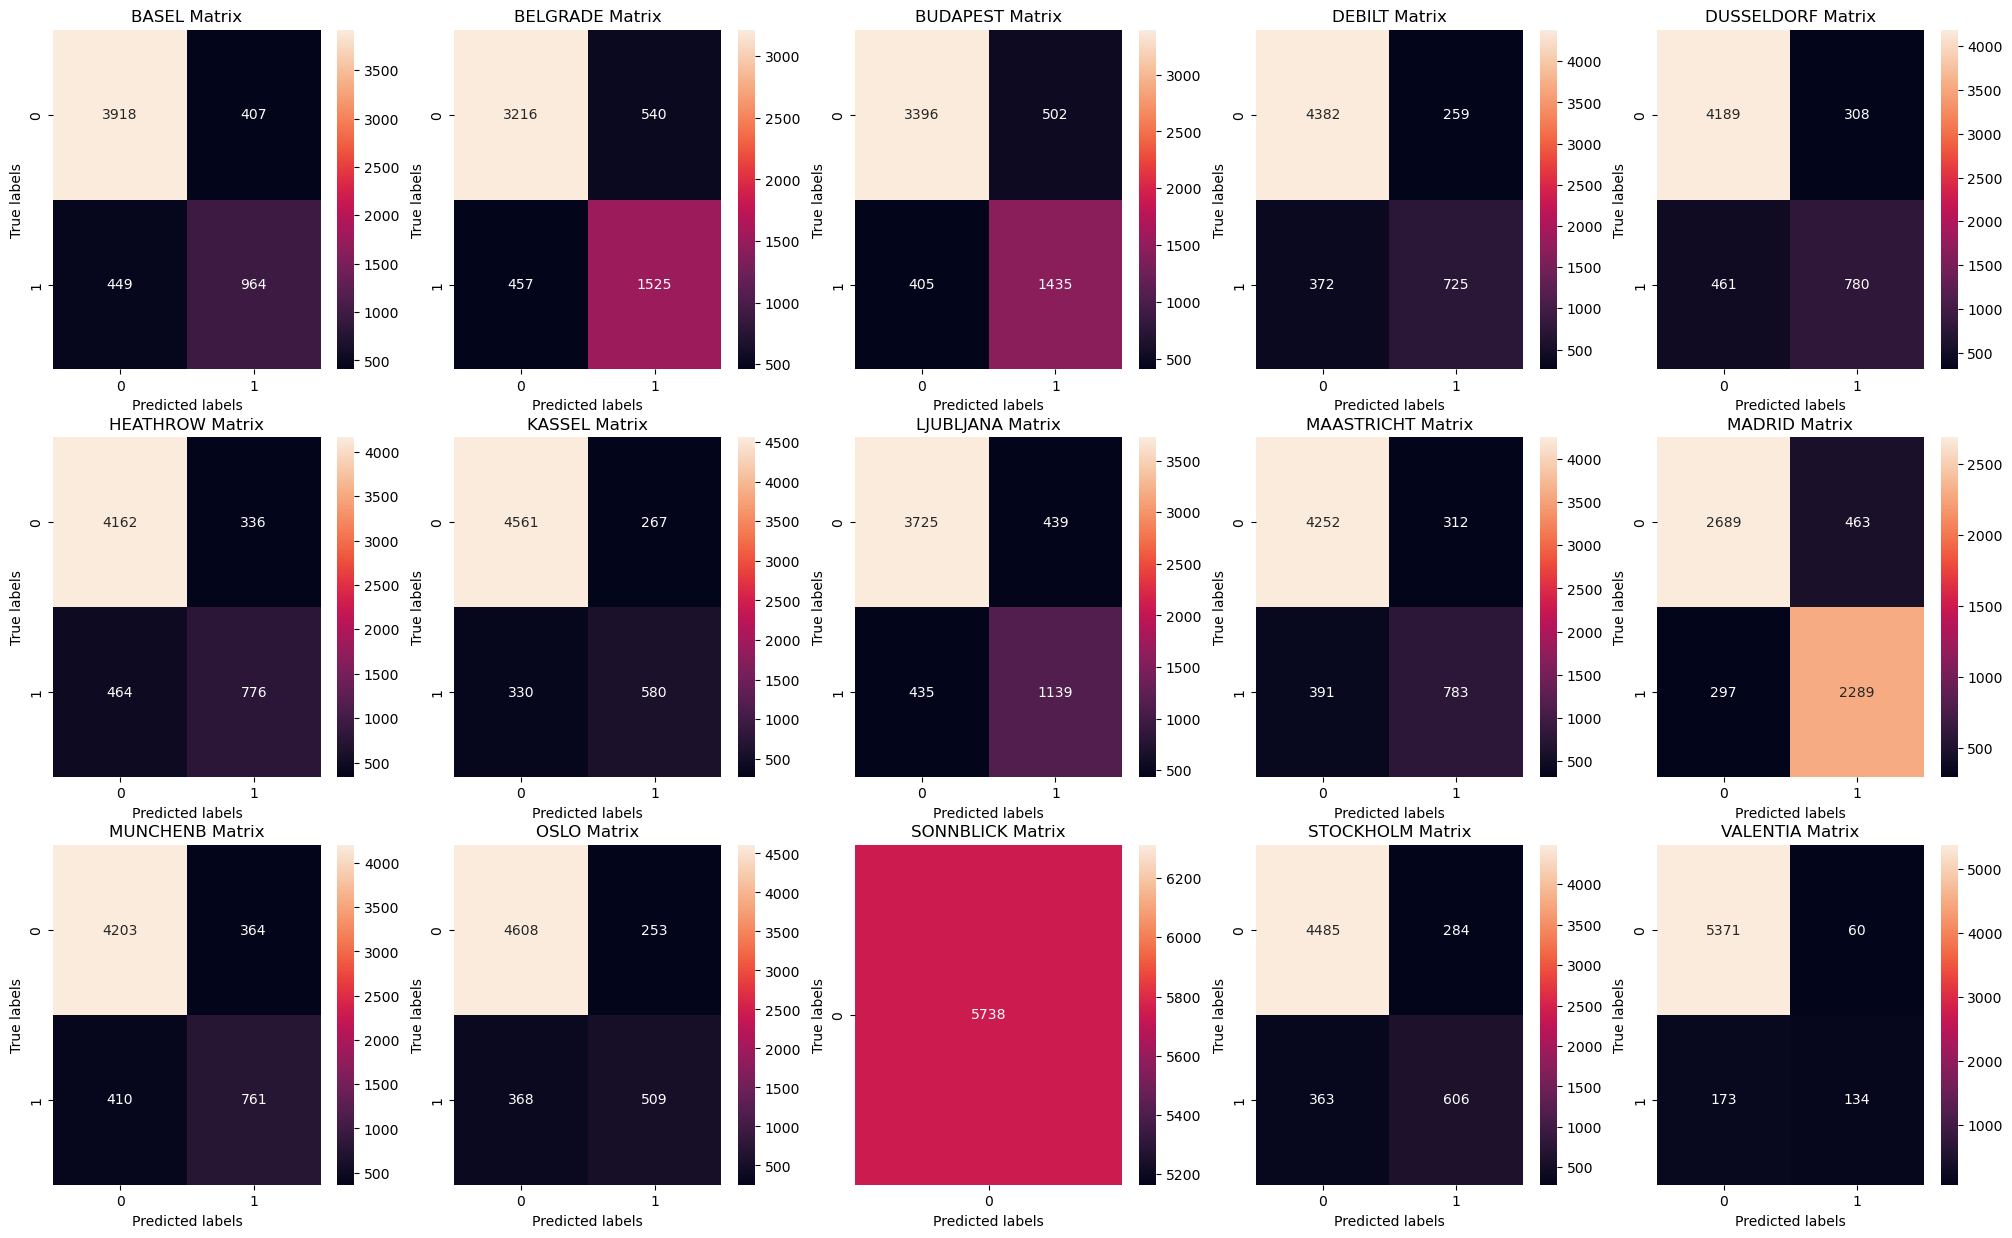

In [62]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
f1_scores_sc = np.empty(15)
for i in range(3):
    for j in range(5):
        name = locations[count]
        f1_scores_sc[count] = f1_score(y_test.loc[:,name+key], y_pred[:,count], zero_division = np.nan)
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [69]:
y_train

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18740,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0
8816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19200,1,1,0,1,1,1,1,1,1,0,1,1,0,1,0
4097,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
6465,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9704,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0
11190,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0
9256,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
y_pred

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
print(metrics.classification_report(y_train.values, y_pred_train, zero_division = np.nan, target_names = locations))


              precision    recall  f1-score   support

       BASEL       0.85      0.84      0.85      4251
    BELGRADE       0.86      0.88      0.87      6010
    BUDAPEST       0.86      0.90      0.88      5591
      DEBILT       0.86      0.82      0.84      3362
  DUSSELDORF       0.86      0.81      0.84      3693
    HEATHROW       0.85      0.80      0.82      3719
      KASSEL       0.87      0.82      0.84      2864
   LJUBLJANA       0.86      0.86      0.86      4802
  MAASTRICHT       0.87      0.83      0.85      3592
      MADRID       0.90      0.94      0.92      7661
    MUNCHENB       0.85      0.82      0.84      3596
        OSLO       0.86      0.79      0.83      2702
   SONNBLICK        nan       nan       nan         0
   STOCKHOLM       0.84      0.82      0.83      2925
    VALENTIA       0.87      0.64      0.74       867

   micro avg       0.86      0.85      0.86     55635
   macro avg       0.86      0.83      0.84     55635
weighted avg       0.86   

In [65]:
print(metrics.classification_report(y_test.values, y_pred, zero_division = np.nan, target_names = locations))


              precision    recall  f1-score   support

       BASEL       0.70      0.68      0.69      1413
    BELGRADE       0.74      0.77      0.75      1982
    BUDAPEST       0.74      0.78      0.76      1840
      DEBILT       0.74      0.66      0.70      1097
  DUSSELDORF       0.72      0.63      0.67      1241
    HEATHROW       0.70      0.63      0.66      1240
      KASSEL       0.68      0.64      0.66       910
   LJUBLJANA       0.72      0.72      0.72      1574
  MAASTRICHT       0.72      0.67      0.69      1174
      MADRID       0.83      0.89      0.86      2586
    MUNCHENB       0.68      0.65      0.66      1171
        OSLO       0.67      0.58      0.62       877
   SONNBLICK        nan       nan       nan         0
   STOCKHOLM       0.68      0.63      0.65       969
    VALENTIA       0.69      0.44      0.53       307

   micro avg       0.73      0.71      0.72     18381
   macro avg       0.71      0.67      0.69     18381
weighted avg       0.73   

In [473]:
f1_scores_sc

array([0.69252874, 0.75364468, 0.75986232, 0.69678039, 0.66981537,
       0.65986395, 0.66021628, 0.72271574, 0.69017188, 0.85762458,
       0.66289199, 0.62111043,        nan, 0.65196342, 0.53493014])

In [ ]:
cm

In [435]:
(cm[0,0] + cm[1,1]) / (cm[0,0] + cm[1,1] + cm[1,0] + cm[0,1])

0.9512025095852213

In [333]:
#Madrid
(2689 + 2289) / (2689 + 2289 + 463 + 297)

0.8675496688741722

In [337]:
#Stockholm 
(4485 + 606) / (4485 + 606 + 284 + 363)

0.887242941791565

<function matplotlib.pyplot.show(close=None, block=None)>

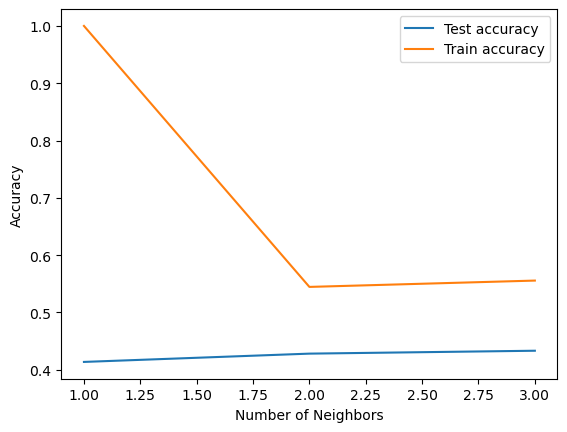

In [319]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

Scaled data did not do significantly better than the original data set. 

## Decision Tree

In [215]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

[Text(0.3270369839456316, 0.984375, 'x[14] <= 17.95\ngini = 0.315\nsamples = 17212\nvalue = [[12961.0, 4251.0]\n[11202.0, 6010.0]\n[11621.0, 5591.0]\n[13850.0, 3362.0]\n[13519.0, 3693.0]\n[13493.0, 3719.0]\n[14348.0, 2864.0]\n[12410.0, 4802.0]\n[13620.0, 3592.0]\n[9551.0, 7661.0]\n[13616.0, 3596.0]\n[14510.0, 2702.0]\n[17212.0, 0.0]\n[14287.0, 2925.0]\n[16345.0, 867.0]]'),
 Text(0.06899675888866495, 0.953125, 'x[29] <= 17.95\ngini = 0.097\nsamples = 10773\nvalue = [[10133, 640]\n[9082, 1691]\n[9525, 1248]\n[10691, 82]\n[10773, 0]\n[10166, 607]\n[10703, 70]\n[9849, 924]\n[10707, 66]\n[8047, 2726]\n[10381, 392]\n[10513, 260]\n[10773, 0]\n[10520, 253]\n[10617, 156]]'),
 Text(0.017684239877022556, 0.921875, 'x[5] <= 17.95\ngini = 0.028\nsamples = 7602\nvalue = [[7485, 117]\n[6924, 678]\n[7247, 355]\n[7588, 14]\n[7602, 0]\n[7563, 39]\n[7582, 20]\n[7383, 219]\n[7585, 17]\n[7602, 0]\n[7451, 151]\n[7563, 39]\n[7602, 0]\n[7572, 30]\n[7588, 14]]'),
 Text(0.005823194064681506, 0.890625, 'x[23] <=

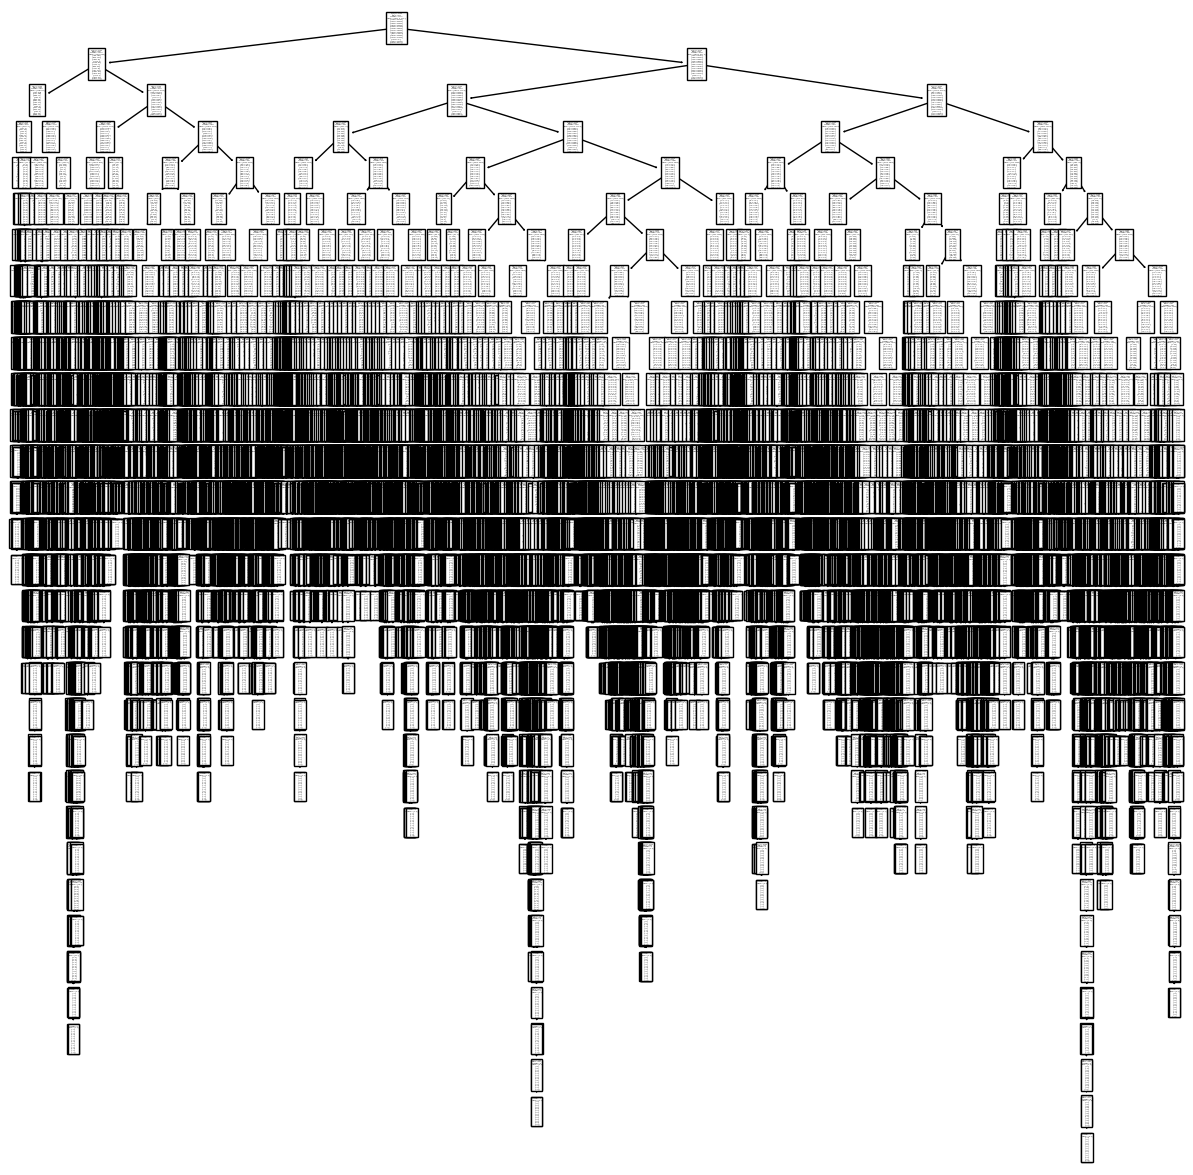

In [217]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(dt)

First impressions is that this is a very complex tree that needs to be pruned. 

In [165]:
y_pred_train = dt.predict(X_train)
##Why does this have such a low score when the confusion matrixes are 100% accurate?
##print('Train accuracy score: ',cross_val_score(dt, X_train, y_train, cv = 3, scoring='accuracy').mean()) 
# Overall accuracy score for training CM is 46% because scikit-learns accuracy method (or the classifiers internal .score() method) can't handle multiple columns of labels and treat each column individually. 
#When you see accuracy of ~46%, the scorer thinks that an entire row of labels is a datapoint, and that it's wrong unless an entire row of predictions matches an entire row of labels. 

print(metrics.classification_report(y_train, y_pred_train, zero_division = np.nan, target_names = locations))



              precision    recall  f1-score   support

       BASEL       1.00      1.00      1.00      4251
    BELGRADE       1.00      1.00      1.00      6010
    BUDAPEST       1.00      1.00      1.00      5591
      DEBILT       1.00      1.00      1.00      3362
  DUSSELDORF       1.00      1.00      1.00      3693
    HEATHROW       1.00      1.00      1.00      3719
      KASSEL       1.00      1.00      1.00      2864
   LJUBLJANA       1.00      1.00      1.00      4802
  MAASTRICHT       1.00      1.00      1.00      3592
      MADRID       1.00      1.00      1.00      7661
    MUNCHENB       1.00      1.00      1.00      3596
        OSLO       1.00      1.00      1.00      2702
   SONNBLICK        nan       nan       nan         0
   STOCKHOLM       1.00      1.00      1.00      2925
    VALENTIA       1.00      1.00      1.00       867

   micro avg       1.00      1.00      1.00     55635
   macro avg       1.00      1.00      1.00     55635
weighted avg       1.00   

Training dataset produces perfect precision/recall and f1 sccores. Sonnblick is unbalanced - only containing one wheter type which is why f1 and other scores are Nan.

In [167]:
y_pred_test = dt.predict(X_test)
print(metrics.classification_report(y_test, y_pred_test, zero_division = np.nan, target_names = locations))


              precision    recall  f1-score   support

       BASEL       0.68      0.67      0.67      1413
    BELGRADE       0.72      0.73      0.72      1982
    BUDAPEST       0.72      0.72      0.72      1840
      DEBILT       0.67      0.67      0.67      1097
  DUSSELDORF       0.69      0.66      0.67      1241
    HEATHROW       0.64      0.63      0.63      1240
      KASSEL       0.62      0.63      0.63       910
   LJUBLJANA       0.68      0.69      0.69      1574
  MAASTRICHT       0.68      0.67      0.68      1174
      MADRID       0.85      0.86      0.85      2586
    MUNCHENB       0.66      0.67      0.67      1171
        OSLO       0.64      0.62      0.63       877
   SONNBLICK        nan       nan       nan         0
   STOCKHOLM       0.64      0.65      0.64       969
    VALENTIA       0.45      0.38      0.41       307

   micro avg       0.70      0.70      0.70     18381
   macro avg       0.67      0.66      0.66     18381
weighted avg       0.70   

C:\Users\isava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


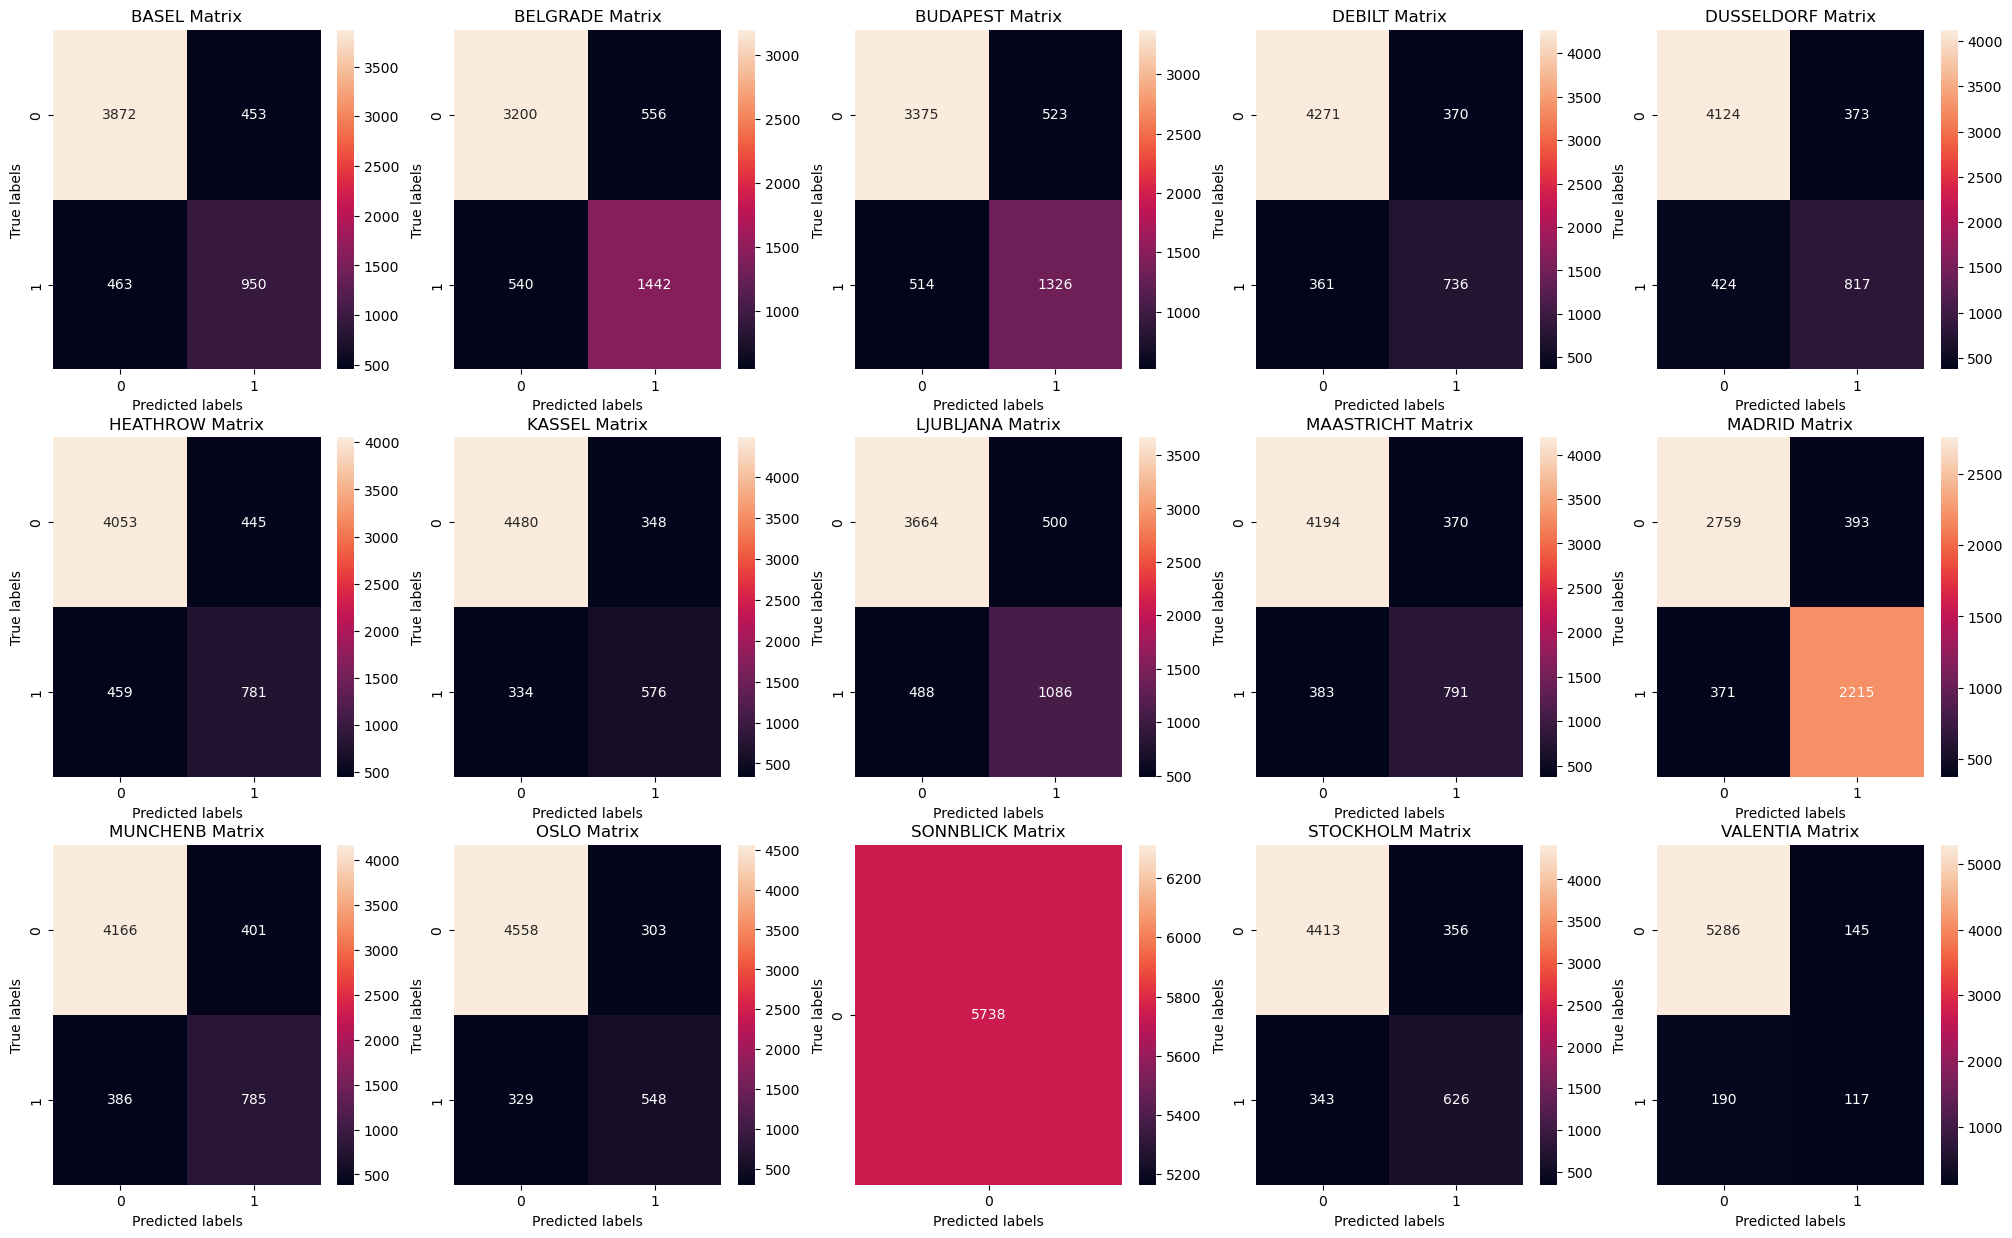

In [175]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['unpleasant', 'pleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks*/
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

## ANN

In [245]:
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

In [247]:
X_train_df.head()

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18740,0.788701,0.089360,0.953395,0.390418,0.321065,0.516245,0.688874,0.311422,0.906812,1.404578,...,1.047681,0.372923,0.373902,0.376060,0.529531,0.150231,0.744975,-0.007287,-0.000520,-0.004530
8816,-1.533592,-1.351478,-1.658119,-1.561635,-1.608767,-1.567283,-1.310904,-1.132804,-1.504696,-1.744046,...,-1.684264,-1.396714,-1.272497,-1.498635,-1.286794,-1.251899,-1.353771,-1.869902,-2.214050,-1.241122
19200,1.970218,1.729464,1.984255,1.218906,1.512640,1.154262,1.253517,1.541689,1.131614,1.768490,...,1.425618,1.265053,1.318792,1.166947,1.425252,1.579068,1.217467,-0.007287,-0.000520,-0.004530
4097,-0.501462,-0.447122,-0.489810,0.492560,0.191546,0.476368,0.335972,0.003856,0.518518,-0.494089,...,-0.820408,-0.182831,0.015990,-0.370889,-0.913576,-0.704401,-1.090054,-1.329143,-1.257587,-1.212364
6465,0.476345,0.978388,0.105798,0.969225,0.683719,1.174201,0.724164,0.886438,0.784193,0.186267,...,0.367394,0.943301,0.846347,1.020486,0.019467,-0.010013,-0.046175,0.323176,-0.875001,1.548400


In [249]:
X_train.head()

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18740,16.2,6.9,23.4,16.1,11.0,22.6,17.6,10.3,25.1,18.9,...,20.0,-2.5,-4.7,-0.2,11.6,5.5,17.5,10.7,7.9,13.5
8816,-0.9,-2.5,0.6,-1.1,-3.9,1.7,0.6,-0.5,1.5,-1.0,...,-5.3,-14.6,-16.2,-13.0,-3.0,-5.0,-1.6,4.5,-0.2,9.2
19200,24.9,17.6,32.4,23.4,20.2,29.0,22.4,19.5,27.3,21.2,...,23.5,3.6,1.9,5.2,18.8,16.2,21.8,10.7,7.9,13.5
4097,6.7,3.4,10.8,17.0,10.0,22.2,14.6,8.0,21.3,6.9,...,2.7,-6.3,-7.2,-5.3,0.0,-0.9,0.8,6.3,3.3,9.3
6465,13.9,12.7,16.0,21.2,13.8,29.2,17.9,14.6,23.9,11.2,...,13.7,1.4,-1.4,4.2,7.5,4.3,10.3,11.8,4.7,18.9


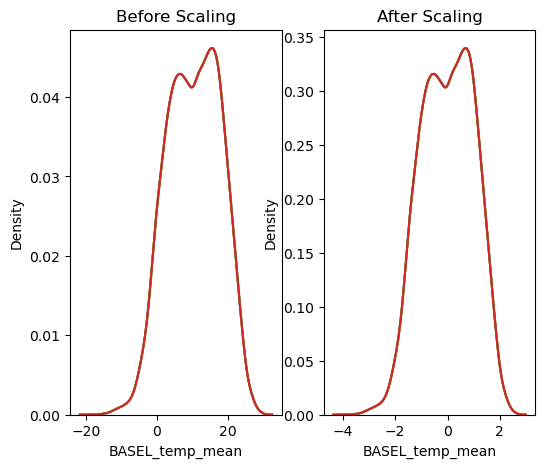

In [237]:
#Show scaling differences for one of the weather stations
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)

plt.show()

Shape is retained but the scaling on the y axis is larger after scaling. 

In [288]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [289]:
y_pred_train = mlp.predict(X_train_df)
print(metrics.classification_report(y_train_sc, y_pred_train, zero_division = np.nan, target_names = locations))

              precision    recall  f1-score   support

       BASEL       0.75      0.73      0.74      4251
    BELGRADE       0.77      0.79      0.78      6010
    BUDAPEST       0.76      0.80      0.78      5591
      DEBILT       0.78      0.73      0.76      3362
  DUSSELDORF       0.77      0.72      0.74      3693
    HEATHROW       0.68      0.65      0.66      3719
      KASSEL       0.71      0.59      0.65      2864
   LJUBLJANA       0.74      0.75      0.75      4802
  MAASTRICHT       0.79      0.75      0.77      3592
      MADRID       0.86      0.90      0.88      7661
    MUNCHENB       0.72      0.65      0.68      3596
        OSLO       0.72      0.66      0.69      2702
   SONNBLICK        nan       nan       nan         0
   STOCKHOLM       0.72      0.69      0.71      2925
    VALENTIA       0.56      0.08      0.14       867

   micro avg       0.76      0.74      0.75     55635
   macro avg       0.74      0.68      0.70     55635
weighted avg       0.76   

In [290]:
y_pred_test =mlp.predict(X_test_df)
print(metrics.classification_report(y_test_sc, y_pred_test, zero_division = np.nan, target_names = locations))

              precision    recall  f1-score   support

       BASEL       0.76      0.70      0.73      1413
    BELGRADE       0.76      0.80      0.78      1982
    BUDAPEST       0.75      0.80      0.78      1840
      DEBILT       0.77      0.71      0.74      1097
  DUSSELDORF       0.77      0.69      0.73      1241
    HEATHROW       0.70      0.64      0.67      1240
      KASSEL       0.69      0.57      0.62       910
   LJUBLJANA       0.74      0.76      0.75      1574
  MAASTRICHT       0.79      0.72      0.75      1174
      MADRID       0.87      0.89      0.88      2586
    MUNCHENB       0.73      0.63      0.67      1171
        OSLO       0.71      0.66      0.68       877
   SONNBLICK        nan       nan       nan         0
   STOCKHOLM       0.73      0.69      0.71       969
    VALENTIA       0.61      0.10      0.17       307

   micro avg       0.76      0.73      0.74     18381
   macro avg       0.74      0.67      0.69     18381
weighted avg       0.76   

C:\Users\isava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


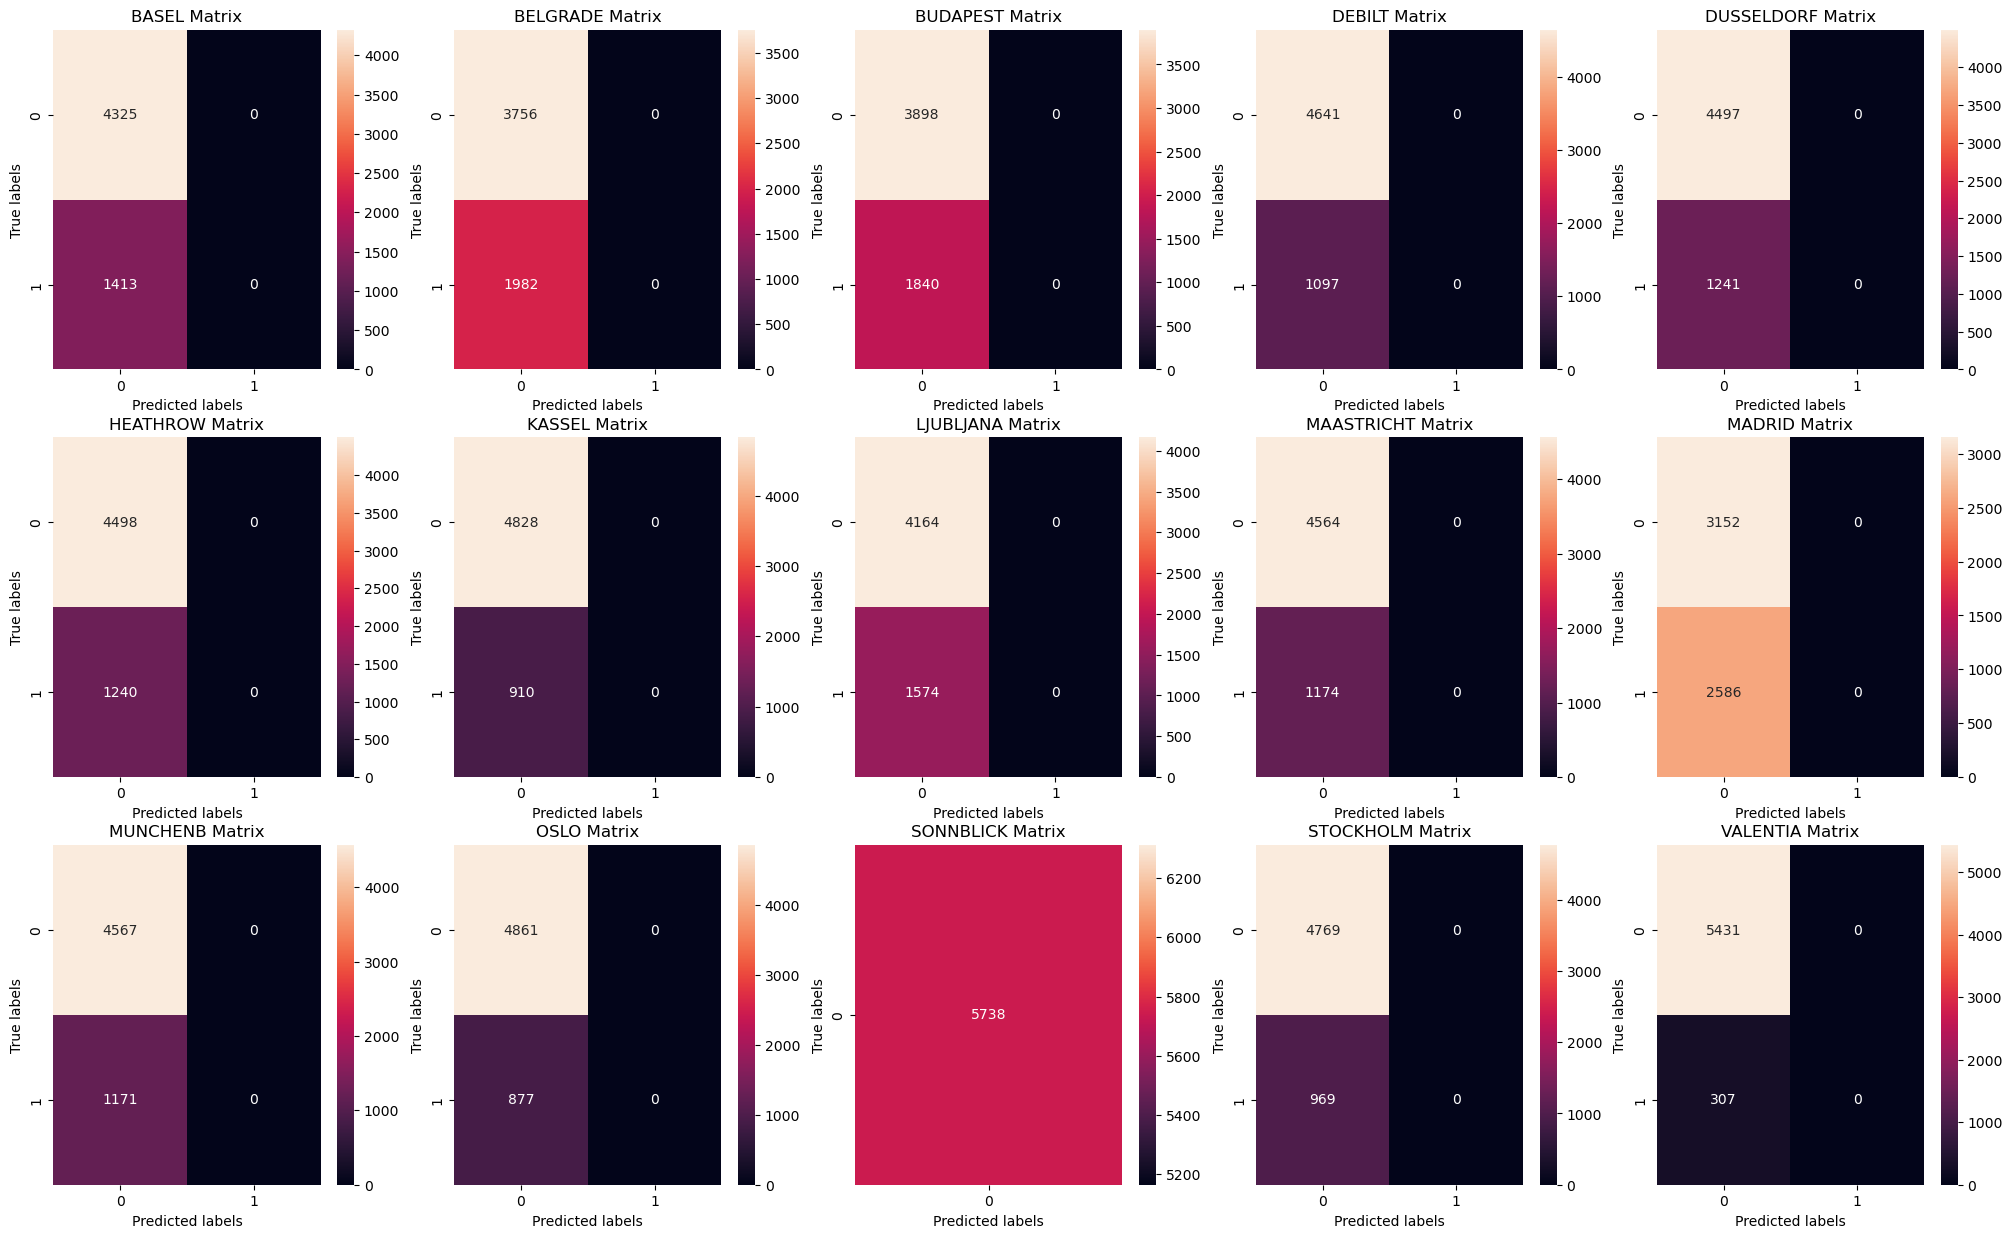

In [266]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['unpleasant', 'pleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test_sc.loc[:,name+key], y_pred_test[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks*/
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

Only predicting unpleasant weather (0). 

In [294]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [296]:
y_pred_train = mlp.predict(X_train_df)
print(metrics.classification_report(y_train_sc, y_pred_train, zero_division = np.nan, target_names = locations))

              precision    recall  f1-score   support

       BASEL       0.76      0.72      0.74      4251
    BELGRADE       0.78      0.83      0.80      6010
    BUDAPEST       0.79      0.83      0.81      5591
      DEBILT       0.79      0.73      0.76      3362
  DUSSELDORF       0.78      0.73      0.75      3693
    HEATHROW       0.70      0.65      0.67      3719
      KASSEL       0.76      0.67      0.71      2864
   LJUBLJANA       0.76      0.78      0.77      4802
  MAASTRICHT       0.81      0.75      0.78      3592
      MADRID       0.88      0.95      0.91      7661
    MUNCHENB       0.73      0.67      0.70      3596
        OSLO       0.74      0.65      0.70      2702
   SONNBLICK        nan       nan       nan         0
   STOCKHOLM       0.74      0.73      0.74      2925
    VALENTIA       0.70      0.33      0.45       867

   micro avg       0.78      0.76      0.77     55635
   macro avg       0.77      0.71      0.73     55635
weighted avg       0.78   

In [298]:
y_pred_test =mlp.predict(X_test_sc)
print(metrics.classification_report(y_test_sc, y_pred_test, zero_division = np.nan, target_names = locations))

              precision    recall  f1-score   support

       BASEL       0.76      0.70      0.73      1413
    BELGRADE       0.78      0.83      0.80      1982
    BUDAPEST       0.78      0.81      0.80      1840
      DEBILT       0.79      0.72      0.75      1097
  DUSSELDORF       0.79      0.68      0.73      1241
    HEATHROW       0.71      0.65      0.68      1240
      KASSEL       0.72      0.64      0.67       910
   LJUBLJANA       0.76      0.77      0.77      1574
  MAASTRICHT       0.81      0.72      0.76      1174
      MADRID       0.88      0.94      0.91      2586
    MUNCHENB       0.73      0.65      0.69      1171
        OSLO       0.73      0.66      0.70       877
   SONNBLICK        nan       nan       nan         0
   STOCKHOLM       0.75      0.71      0.73       969
    VALENTIA       0.73      0.30      0.43       307

   micro avg       0.78      0.75      0.77     18381
   macro avg       0.77      0.70      0.73     18381
weighted avg       0.78   

C:\Users\isava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


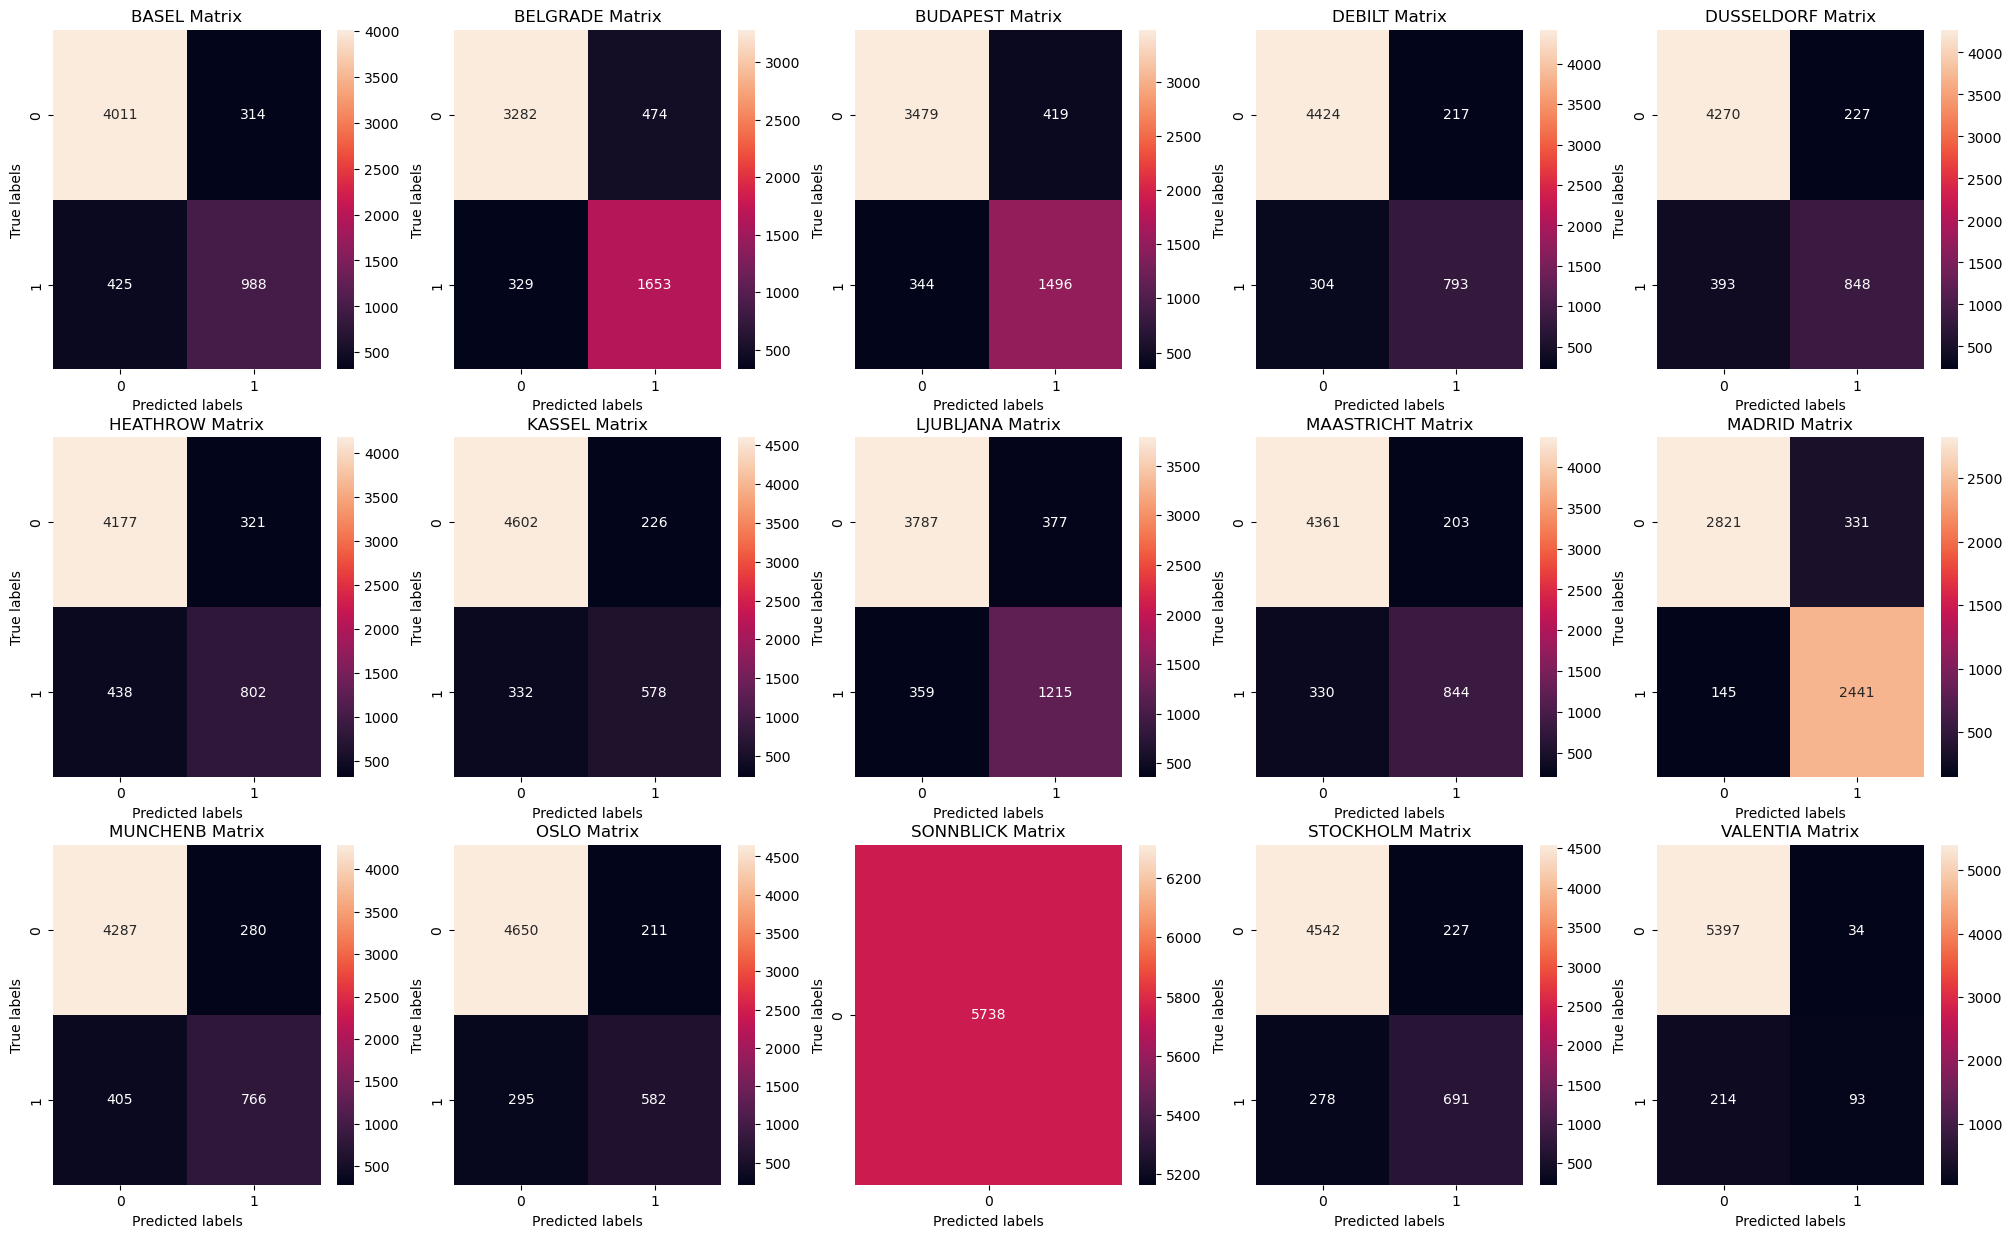

In [300]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['unpleasant', 'pleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test_sc.loc[:,name+key], y_pred_test[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks*/
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

A little better, we have two classes being predicted now.

In [405]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50,25), max_iter=1000000, tol=0.000000000001)
#Fit the data to the model
mlp.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000000, tol=1e-12)

In [406]:
y_pred_train = mlp.predict(X_train_df)
print(metrics.classification_report(y_train_sc, y_pred_train, zero_division = np.nan, target_names = locations))

              precision    recall  f1-score   support

       BASEL       0.86      0.81      0.84      4251
    BELGRADE       0.84      0.92      0.88      6010
    BUDAPEST       0.83      0.93      0.88      5591
      DEBILT       0.80      0.87      0.83      3362
  DUSSELDORF       0.82      0.84      0.83      3693
    HEATHROW       0.76      0.89      0.82      3719
      KASSEL       0.82      0.87      0.84      2864
   LJUBLJANA       0.80      0.92      0.86      4802
  MAASTRICHT       0.84      0.88      0.86      3592
      MADRID       0.90      0.94      0.92      7661
    MUNCHENB       0.82      0.84      0.83      3596
        OSLO       0.79      0.81      0.80      2702
   SONNBLICK        nan       nan       nan         0
   STOCKHOLM       0.77      0.88      0.82      2925
    VALENTIA       0.81      0.67      0.74       867

   micro avg       0.83      0.88      0.86     55635
   macro avg       0.82      0.86      0.84     55635
weighted avg       0.83   

In [315]:
y_pred_test =mlp.predict(X_test_sc)
print(metrics.classification_report(y_test_sc, y_pred_test, zero_division = np.nan, target_names = locations))

              precision    recall  f1-score   support

       BASEL       0.83      0.74      0.78      1413
    BELGRADE       0.79      0.90      0.84      1982
    BUDAPEST       0.77      0.92      0.84      1840
      DEBILT       0.76      0.80      0.78      1097
  DUSSELDORF       0.78      0.73      0.76      1241
    HEATHROW       0.81      0.74      0.77      1240
      KASSEL       0.76      0.74      0.75       910
   LJUBLJANA       0.80      0.84      0.82      1574
  MAASTRICHT       0.79      0.80      0.80      1174
      MADRID       0.88      0.95      0.91      2586
    MUNCHENB       0.75      0.78      0.77      1171
        OSLO       0.75      0.75      0.75       877
   SONNBLICK        nan       nan       nan         0
   STOCKHOLM       0.76      0.82      0.79       969
    VALENTIA       0.74      0.59      0.66       307

   micro avg       0.80      0.82      0.81     18381
   macro avg       0.78      0.79      0.79     18381
weighted avg       0.80   

C:\Users\isava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


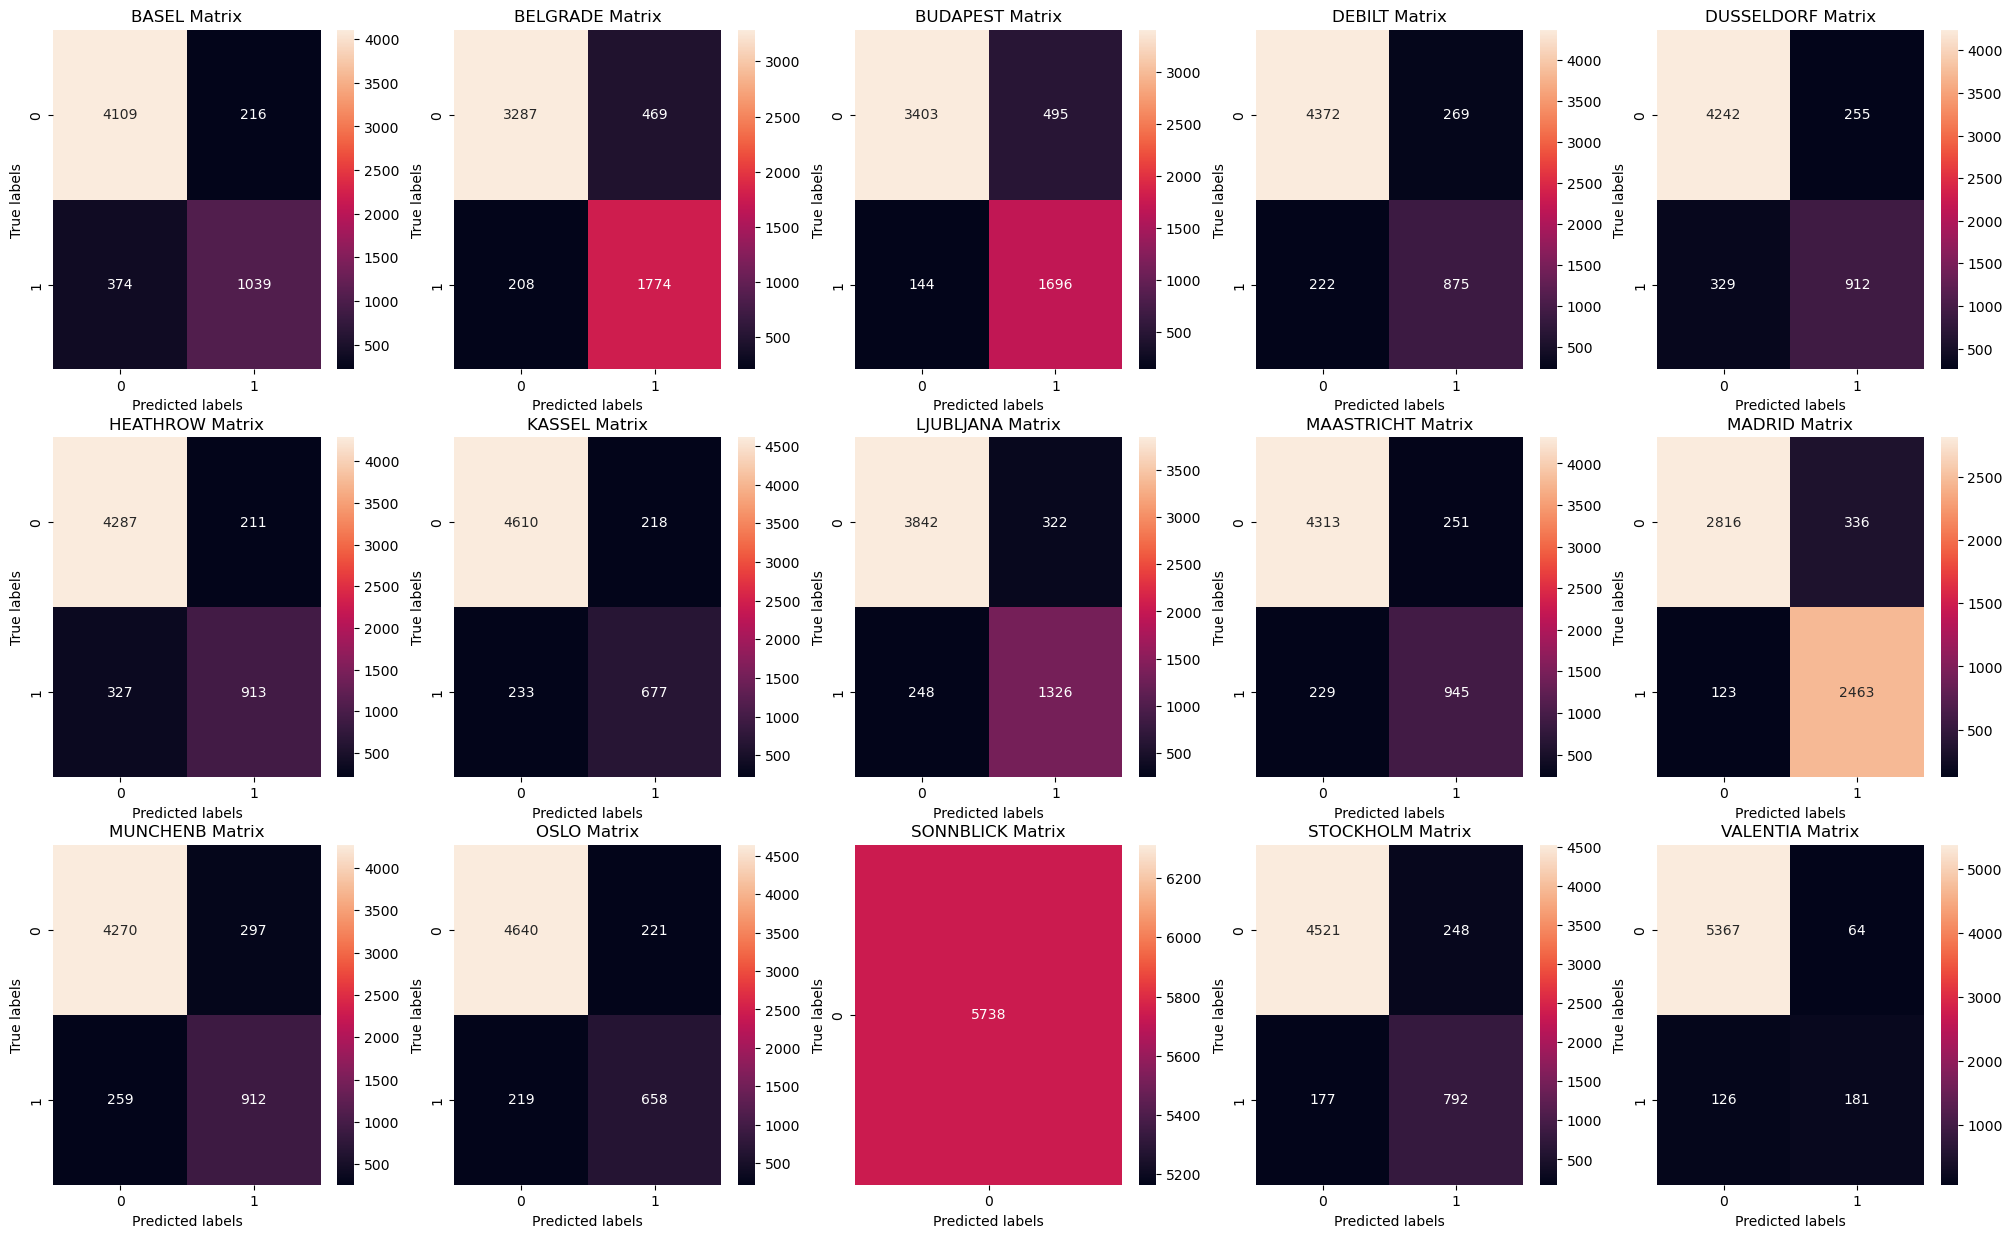

In [317]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['unpleasant', 'pleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test_sc.loc[:,name+key], y_pred_test[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks*/
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

# Conclusion

## KNN

The KNN algorithm does pretty well at predicting pleasant weather at a 95% accuracy rate but could still be approved upon. While this seems highly accurate on an aggregate level, looking into the specific weather stations paints a different picture. None of the weather stations are fully accurate except for Sonnblick which has a perfect accuracy rating. Other weather stations such as Madrid and Stockholm have accuracy rating of 85% and 88% respectively. The f1 scores for the scaled data mirror the other classifiers.
- Categorization for pleasant weather should be improved upon. There is less data for this category which may contribute to it not being predicted as accurately. Since Sonnblick did not have any pleasant whether this may explain its high accuracy and give insight into what the KNN algorthim favors. This points to overfitting. The algorithm fits a weather pattern such as Sonnblick well but then does not accurately predict other location.
- There is variation in the various weather stations which indicates that the KNN algorithm fits specific areas better than others. This may be due to their specific weather patterns and locations. 

## Decision Tree

The decision tree variates in performance between the different weather stations. It does well for cities such as Madrid but struggles more with weatehr stations in valentia. Madrid has is more balanced between pleasant and unpleasant weather while other stations are more skewed to one class than another. 

The first iteration of the tree should be pruned. It is complicated and pretty much impossible to read. Ther are more than 12 results for only 12 cities and two classes. There are many more rows. The complexity of the tree seems to indicate overfitting as well.

## ANN

The ANN currently does not converge on the test data. There is hyperparamter tuning that needs to be done to get a closer answer. 

## Final Thoughts

The three classifiers performed about the same with f1 scores very similar to each other. With a more fined tuned ANN approach the f1 score is slighltly higher than the KNN and decision tree classifiers. ANN may be the best option to fine-tune ging forward. A common issue is that the models are doing well on specific cities but not others. Using hyperparameters may help with this problem. Each model overfits on SONNBLICK data due to it only having one type of classified weather. 